### **Задача** : Дано два датасета expression_mouse_mRNA (возрастные изменения экспрессии генов) и diet_mouse_mRNA (изменения экспрессии генов после диеты), там есть колонки Gene и effect. Между этими списками генов есть значимое пересечение (63 общих гена). Нам нужно посмотреть на какие гены диета и возраст влияют в одном направлении, на какие в разном и для каких данные противоречивые (в одном из датасетов у одного и того же гена экспрессия то увеличивается, то уменьшается).

### Содержание
1. [Шаг 1. Откроем файл с данными и изучим общую информацию.](#Шаг-1.-Откроем-файл-с-данными-и-изучим-общую-информацию)
2. [Шаг 2. Создадим датасеты с 62 уникальными генами, присутствующими в обоих исходных датасетах](#Шаг-2.-Создадим-датасеты-с-62-уникальными-генами,-присутствующими-в-обоих-исходных-датасетах)
3. [Шаг 3.Создадим датасеты с 9 уникальными генами, присутствующими в обоих исходных датасетах и имеющими более 1 записи в каждом](#Шаг-3.-Создадим-датасеты-с-9-уникальными-генами,-присутствующими-в-обоих-исходных-датасетах-и-имеющими-более-1-записи-в-каждом)
4. [Шаг 4.Преобразуем данные в датасетах для построения графиков Heatmap](#Шаг-4.-Преобразуем-данные-в-датасетах-для-построения-графиков-Heatmap)
5. [Шаг 5. Создадим датасеты с общими 62 генами overall_genes_effect и 9 генами max_genes_effect, имеющими больше 1 записи в обоих исходных датасетах для анализа корреляции effect ](#Шаг-5.-Создадим-датасеты-с-общими-62-генами-overall_genes_effect-и-9-генами-max_genes_effect,-имеющими-больше-1-записи-в-обоих-исходных-датасетах-для-анализа-корреляции-effect )
6. [Шаг 6. Создадим функцию для цветового анализа корреляций effect](#Шаг-6.-Создадим-функцию-для-цветового-анализа-корреляций-effect)
7. [Шаг 7. Графики Heatmap для датасетов с 62 генами overall_genes_effect и 9 генами max_genes_effect, имеющими больше 1 записи в обоих исходных датасетах для анализа корреляции effect ](#Шаг-7.-Графики-Heatmap-для-датасетов-с-62-генами-overall_genes_effect-и-9-генами-max_genes_effect,-имеющими-больше-1-записи-в-обоих-исходных-датасетах-для-анализа-корреляции-effect )

### Шаг 1. Откроем файл с данными и изучим общую информацию

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 #### Cохраним датасетс в переменные (используем с диска датасеты <mark>diet_mouse_mRNA.csv</mark> и <mark>expression_mouse_mRNA (50more).csv</mark>

In [59]:
url_d = 'https://drive.google.com/file/d/1alGKw9yYS_f6PK3XAxJgSmLPkvoqWb6y/view?usp=sharing'

path = 'https://drive.google.com/uc?id='+url_d.split('/')[-2]
diet = pd.read_csv(path, sep = ';')

In [60]:
url = 'https://drive.google.com/file/d/13T_4XMuIuG4qCfloWt2rUMvDj5uaJsW-/view?usp=sharing'

path = 'https://drive.google.com/uc?id='+url.split('/')[-2]
expression = pd.read_csv(path, sep = ';', encoding='latin-1')

#### Проанализаруем данные поочередно

#### <mark>Проанализируем таблицу <b>diet</b></mark>

In [61]:
diet.head()

,Gene,effect,qualityType,restriction_persent,restriction_time,age,organism,line,sex,sample,link
0,0610007P14Rik,increase,mRNA,40,16_weeks,5_months,mouse,C57BL/6J,male,liver,10.1038/s41598-017-00267-9
1,0610011F06Rik,decrease,mRNA,60,20_days,20_weeks,mouse,C57BL/6J,both,muscle,10.3390/genes12050691
2,1110001J03Rik,increase,mRNA,40,16_weeks,5_months,mouse,C57BL/6J,male,liver,10.1038/s41598-017-00267-9
3,1110002E22Rik,increase,mRNA,60,20_days,20_weeks,mouse,C57BL/6J,both,muscle,10.3390/genes12050691
4,1110002E22Rik,decrease,mRNA,60,20_days,80_weeks,mouse,C57BL/6J,both,muscle,10.3390/genes12050691


In [62]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gene                 6075 non-null   object
 1   effect               6075 non-null   object
 2   qualityType          6075 non-null   object
 3   restriction_persent  6075 non-null   int64 
 4   restriction_time     6075 non-null   object
 5   age                  6075 non-null   object
 6   organism             6075 non-null   object
 7   line                 6075 non-null   object
 8   sex                  6075 non-null   object
 9   sample               6075 non-null   object
 10  link                 6075 non-null   object
dtypes: int64(1), object(10)
memory usage: 522.2+ KB


In [63]:
diet.describe()

,restriction_persent
count,6075.000000
mean,43.576955
std,12.318974
min,10.000000
25%,40.000000
50%,40.000000
75%,60.000000
max,60.000000


#### <mark>Проанализируем таблицу <b>expression</b></mark>

In [64]:
expression.head()

,Unnamed: 0,Gene,Gene human,effect,change type,expression evaluation by,sample,model organism,line,sex,...,age of control - max,age of experiment - max,age unit,doi,pmid,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Acox1,ACOX1,increase,increased gene expression,mRNA,acoustic nerve,mouse,C57BL/6,male,...,NaN,NaN,months,10.1016/j.bbadis.2013.10.017,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Adamts1,ADAMTS1,increase,increased gene expression,mRNA,acoustic nerve,mouse,C57BL/6,both,...,NaN,NaN,months,10.1152/ajpendo.00040.2016,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Adamts1,ADAMTS1,increase,increased gene expression,mRNA,acoustic nerve,mouse,C57BL/6,both,...,NaN,NaN,months,10.1152/ajpendo.00040.2016,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Akt1s1,AKT1S1,decrease,decreased gene expression,mRNA,acoustic nerve,mouse,C57BL/6,female,...,NaN,NaN,months,10.1002/cbf.3539,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Apc,APC,decrease,decreased gene expression,mRNA,acoustic nerve,mouse,C57BL/6J,male,...,NaN,NaN,months,10.1007/s11357-014-9618-3,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
expression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                456 non-null    object 
 1   Gene                      456 non-null    object 
 2   Gene human                456 non-null    object 
 3   effect                    456 non-null    object 
 4   change type               456 non-null    object 
 5   expression evaluation by  456 non-null    object 
 6   sample                    456 non-null    object 
 7   model organism            456 non-null    object 
 8   line                      452 non-null    object 
 9   sex                       435 non-null    object 
 10  change percentage         435 non-null    object 
 11  p_value                   69 non-null     object 
 12  age of control - min      3 non-null      float64
 13  age of experiment - min   2 non-null      float64
 14  age of con

In [66]:
expression.describe()

,age of control - min,age of experiment - min,age of control - mean,age of experiment - mean,age of control - max,age of experiment - max,pmid,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,3.000000,2.000000,451.000000,454.000000,3.000000,1.0,7.000000e+00,0.0,0.0,0.0,0.0,0.0
mean,4.000000,56.500000,4.387373,31.059361,7.333333,26.0,1.019225e+07,NaN,NaN,NaN,NaN,NaN
std,3.464102,45.961941,6.618184,68.268335,4.163332,NaN,4.494329e+06,NaN,NaN,NaN,NaN,NaN
min,2.000000,24.000000,0.000000,2.000000,4.000000,26.0,6.600000e+01,NaN,NaN,NaN,NaN,NaN
25%,2.000000,40.250000,2.000000,18.000000,5.000000,26.0,1.189094e+07,NaN,NaN,NaN,NaN,NaN
50%,2.000000,56.500000,3.500000,24.000000,6.000000,26.0,1.189094e+07,NaN,NaN,NaN,NaN,NaN
75%,5.000000,72.750000,5.000000,30.000000,9.000000,26.0,1.189094e+07,NaN,NaN,NaN,NaN,NaN
max,8.000000,89.000000,91.000000,910.000000,12.000000,26.0,1.189094e+07,NaN,NaN,NaN,NaN,NaN


### Шаг 2. Создадим датасеты с 62 уникальными генами, присутствующими в обоих исходных датасетах


#### Создадим датасет <mark>gene_diet</mark>  с уникальными генами из датасета <mark>diet</mark>

In [67]:
gene_diet = diet['Gene'].unique()
gene_diet = pd.Series(gene_diet)
gene_diet = pd.DataFrame(gene_diet, columns = ['Gene'])
gene_diet.value_counts()

Gene         
0610007P14Rik    1
Podxl2           1
Plxnd1           1
Pmaip1           1
Pmepa1           1
                ..
Frzb             1
Fscn1            1
Fsd2             1
Fst              1
Zyg11a           1
Length: 4339, dtype: int64

#### Вывод: В датасете diet представлено 4339 уникальных гена

#### Создадим датасет <mark>gene_expression</mark>  с уникальными генами из датасета <mark>expression</mark>

In [68]:
gene_expression = expression['Gene'].unique()
gene_expression = pd.Series(gene_expression)
gene_expression = pd.DataFrame(gene_expression, columns = ['Gene'])
gene_expression.value_counts()

Gene    
Acox1       1
Adamts1     1
Ppara       1
Ppargc1a    1
Ppm1d       1
           ..
Hbp1        1
Hdac1       1
Hdac2       1
Hdac3       1
Zfyve9      1
Length: 160, dtype: int64

#### Вывод: В датасете expression представлено 160 уникальных гена

#### Создадим датасет <mark>overall_genes</mark> с уникальными генами, которые есть в датасете "gene_expression" и "gene_diet"

In [69]:
overall_genes = pd.merge(gene_expression, gene_diet, on = 'Gene', how = 'inner')

In [70]:
overall_genes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gene    62 non-null     object
dtypes: object(1)
memory usage: 992.0+ bytes


#### Вывод: В датасетах expression и diet представлено 62 уникальных гена, которые есть в обоих датасетах

### Создадим датасеты diet_overall_genes и expression_overall_genes  из датасетов diet и expression, где будут только эти 62 гена

In [71]:
diet_overall_genes = pd.merge(diet, overall_genes, on = 'Gene', how = 'inner')
expression_overall_genes = pd.merge(expression, overall_genes, on = 'Gene', how = 'inner')

#### <mark>Проанализируем полученные датасеты</mark>

#### 1. датасет diet_overall_genes, созданный на основе датасета diet

In [72]:
diet_overall_genes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gene                 83 non-null     object
 1   effect               83 non-null     object
 2   qualityType          83 non-null     object
 3   restriction_persent  83 non-null     int64 
 4   restriction_time     83 non-null     object
 5   age                  83 non-null     object
 6   organism             83 non-null     object
 7   line                 83 non-null     object
 8   sex                  83 non-null     object
 9   sample               83 non-null     object
 10  link                 83 non-null     object
dtypes: int64(1), object(10)
memory usage: 7.8+ KB


In [73]:
diet_overall_genes.describe()

,restriction_persent
count,83.000000
mean,47.831325
std,11.692002
min,20.000000
25%,40.000000
50%,40.000000
75%,60.000000
max,60.000000


In [74]:
diet_overall_genes.head()

,Gene,effect,qualityType,restriction_persent,restriction_time,age,organism,line,sex,sample,link
0,Acox1,decrease,mRNA,60,20_days,20_weeks,mouse,C57BL/6J,both,muscle,10.3390/genes12050691
1,Adamts1,decrease,mRNA,40,16_weeks,5_months,mouse,C57BL/6J,male,liver,10.1038/s41598-017-00267-9
2,Brca1,increase,mRNA,40,16_weeks,5_months,mouse,C57BL/6J,male,liver,10.1038/s41598-017-00267-9
3,C1qb,decrease,mRNA,40,16_weeks,5_months,mouse,C57BL/6J,male,liver,10.1038/s41598-017-00267-9
4,Ccnd1,increase,mRNA,40,16_weeks,5_months,mouse,C57BL/6J,male,liver,10.1038/s41598-017-00267-9


#### 2. датасет expression_overall_genes, созданный на основе датасета expression

In [75]:
expression_overall_genes.head()

,Unnamed: 0,Gene,Gene human,effect,change type,expression evaluation by,sample,model organism,line,sex,...,age of control - max,age of experiment - max,age unit,doi,pmid,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Acox1,ACOX1,increase,increased gene expression,mRNA,acoustic nerve,mouse,C57BL/6,male,...,NaN,NaN,months,10.1016/j.bbadis.2013.10.017,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Adamts1,ADAMTS1,increase,increased gene expression,mRNA,acoustic nerve,mouse,C57BL/6,both,...,NaN,NaN,months,10.1152/ajpendo.00040.2016,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Adamts1,ADAMTS1,increase,increased gene expression,mRNA,acoustic nerve,mouse,C57BL/6,both,...,NaN,NaN,months,10.1152/ajpendo.00040.2016,NaN,NaN,NaN,NaN,NaN,NaN
3,12,Brca1,BRCA1,decrease,decreased gene expression,mRNA,aortic valves,mouse,FVB,female,...,NaN,NaN,months,10.1126/scitranslmed.3004925,NaN,NaN,NaN,NaN,NaN,NaN
4,16,C1qb,C1QB,increase,increased gene expression,mRNA,bone,mouse,C57BL/6N,NaN,...,NaN,NaN,months,10.1016/j.exger.2018.05.001,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
expression_overall_genes.describe()

,age of control - min,age of experiment - min,age of control - mean,age of experiment - mean,age of control - max,age of experiment - max,pmid,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,2.000000,2.000000,181.000000,181.000000,2.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0
mean,5.000000,56.500000,4.495055,32.579834,8.000000,26.0,66.0,NaN,NaN,NaN,NaN,NaN
std,4.242641,45.961941,9.603052,94.318301,5.656854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,24.000000,0.000000,3.000000,4.000000,26.0,66.0,NaN,NaN,NaN,NaN,NaN
25%,3.500000,40.250000,2.000000,14.000000,6.000000,26.0,66.0,NaN,NaN,NaN,NaN,NaN
50%,5.000000,56.500000,3.000000,21.000000,8.000000,26.0,66.0,NaN,NaN,NaN,NaN,NaN
75%,6.500000,72.750000,5.000000,25.000000,10.000000,26.0,66.0,NaN,NaN,NaN,NaN,NaN
max,8.000000,89.000000,91.000000,910.000000,12.000000,26.0,66.0,NaN,NaN,NaN,NaN,NaN


In [77]:
expression_overall_genes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                181 non-null    object 
 1   Gene                      181 non-null    object 
 2   Gene human                181 non-null    object 
 3   effect                    181 non-null    object 
 4   change type               181 non-null    object 
 5   expression evaluation by  181 non-null    object 
 6   sample                    181 non-null    object 
 7   model organism            181 non-null    object 
 8   line                      180 non-null    object 
 9   sex                       171 non-null    object 
 10  change percentage         171 non-null    object 
 11  p_value                   27 non-null     object 
 12  age of control - min      2 non-null      float64
 13  age of experiment - min   2 non-null      float64
 14  age of con

### Шаг 3. Создадим датасеты с 9 уникальными генами, присутствующими в обоих исходных датасетах и имеющими более 1 записи в каждом

#### Посмотрим какое количество экспериментов было произведено по каждому гену

In [78]:
diet_overall_genes['Gene'].value_counts().head(20)

Gclm      5
Foxo1     3
Sncg      3
Dbn1      3
Spp1      2
Pdgfb     2
Egr1      2
Jun       2
Kdr       2
Ucp3      2
Wnt4      2
Wnt5a     2
Cdkn1a    2
Ccnd1     2
Igfbp3    2
Lamb1     1
Mdm2      1
Pdgfra    1
Nfkbia    1
Nrip1     1
Name: Gene, dtype: int64

In [79]:
expression_overall_genes['Gene'].value_counts().head(45)

Igfbp5      14
Cdkn1a      10
Wnt5b        9
Pdgfra       7
Pdgfb        6
Efemp1       6
Col4a1       6
Col4a2       6
Sub1         6
Nrip1        5
Wnt5a        5
Nfkbia       4
Mmp9         4
Ppargc1a     4
Gpcpd1       4
Zfyve9       4
Cisd2        4
Hdac2        3
Cybb         3
C1qb         3
Sirt3        3
Sncg         3
Frzb         3
Dixdc1       3
Fzd2         2
Flt1         2
Wnt9b        2
Ucp2         2
Ccnd1        2
Porcn        2
Ppara        2
Lama3        2
Timp2        2
Col4a4       2
Gclm         2
Igfbp3       2
Adamts1      2
Dvl2         2
Slc19a1      2
Wnt4         2
Gdf11        2
Ucp3         2
Rela         1
Spp1         1
Acox1        1
Name: Gene, dtype: int64

#### Вывод: Видно, что больше всего диета повлияла на гены Gclm = 5, Dbn1 = 3, Foxo1 = 3, Sncg = 3
####                Видно, что больше всего возраст повлиял на гены Igfbp5 = 14, Cdkn1a = 10, Wnt5b = 9, PdgFra = 7

#### Посмотрим те гены, которые имели количество записей больше 1 раза в обоих датасетах

In [80]:
max_d_genes = ['Gclm', 'Dbn1', 'Foxo1', 'Sncg', 'Pdgfb', 'Egr1', 'Jun', 'Spp1', 'Kdr', 'Ucp3',
               'Wnt4', 'Wnt5a', 'Cdkn1a', 'Ccnd1', 'Igfbp3']
max_d_genes = pd.DataFrame(max_d_genes, columns = ['Gene'])
max_d_genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gene    15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [81]:
max_ex_genes = ['Igfbp5', 'Cdkn1a', 'Wnt5b', 'Pdgfra', 'Pdgfb', 'Efemp1', 'Col4a1', 'Col4a2', 'Sub1', 'Nrip1', 
                'Wnt5a', 'Nfkbia', 'Mmp9', 'Ppargc1a', 'Gpcpd1', 'Zfyve9', 'Cisd2', 'Hdac2', 'Cybb', 'C1qb', 'Sirt3',
                 'Sncg', 'Frzb', 'Dixdc1', 'Fzd2', 'Flt1', 'Wnt9b', 'Ucp2', 'Ccnd1', 'Porcn', 'Ppara', 'Lama3', 'Timp2',
                'Col4a4', 'Gclm', 'Igfbp3', 'Adamts1', 'Dvl2', 'Slc19a1', 'Wnt4', 'Gdf11', 'Ucp3' ]
max_ex_genes = pd.DataFrame(max_ex_genes, columns = ['Gene'])
max_ex_genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gene    42 non-null     object
dtypes: object(1)
memory usage: 464.0+ bytes


In [82]:
max_genes = pd.merge(max_d_genes, max_ex_genes, on = 'Gene', how = 'inner')
max_genes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gene    9 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes


### Создадим датасеты diet_overall_max_genes и exp_overall_max_genes  из датасетов diet_overall_genes и expression_overall_genes, где будут только эти 9 генов

In [83]:
diet_overall_max_genes = pd.merge(diet_overall_genes, max_genes, on = 'Gene', how = 'inner')
exp_overall_max_genes = pd.merge(expression_overall_genes, max_genes, on = 'Gene', how = 'inner')

### Шаг 4. Преобразуем данные в датасетах для построения графиков Heatmap

In [84]:
diet_overall_days = diet_overall_genes.copy()
expression_overall_days = expression_overall_genes.copy()

#### Рассмотрим датасет diet_overall_days. Данные в столбцах restriction_time, age и effect, sex указаны в типе object. Удобно привести к типу float и одному минимальному типу исчисления, для построения графика Heatmap. Минимальное уникальное значение в столбце restriction_time - 20_days. Значит мерой исчисления столбцов restriction_time и age будет days. Добавим новые столбцы restriction_time_days и age_days в датасет diet_overall_genes. Также значения в столбце effect заменим на числовые значения decrease на -1 и increase на 1. Значения в столбце sex заменим на числовые значения male на -1, both на 0 и female на 1.

In [85]:
diet_overall_days['restriction_time'].unique()

array(['20_days', '16_weeks', '8_months'], dtype=object)

In [86]:
diet_overall_days['sex'].unique()

array(['both', 'male'], dtype=object)

In [87]:
diet_overall_days.loc[(diet_overall_days.restriction_time == '20_days'), 'restriction_time'] = 20
diet_overall_days.loc[(diet_overall_days.restriction_time == '16_weeks'), 'restriction_time'] = 112
diet_overall_days.loc[(diet_overall_days.restriction_time == '8_months'), 'restriction_time'] = 240

diet_overall_days.loc[(diet_overall_days.age == '20_weeks'), 'age'] = 140
diet_overall_days.loc[(diet_overall_days.age == '5_months'), 'age'] = 150
diet_overall_days.loc[(diet_overall_days.age == '80_weeks'), 'age'] = 560
diet_overall_days.loc[(diet_overall_days.age == '3_months'), 'age'] = 90

diet_overall_days.loc[(diet_overall_days.effect == 'decrease'), 'effect'] = 0
diet_overall_days.loc[(diet_overall_days.effect == 'increase'), 'effect'] = 1

diet_overall_days.loc[(diet_overall_days['sex'] == 'male'), 'sex'] = -1
diet_overall_days.loc[(diet_overall_days['sex'] == 'both'), 'sex'] = 0
diet_overall_days.loc[(diet_overall_days['sex'] == 'female'), 'sex'] = 1

In [88]:
diet_overall_days = diet_overall_days.astype({'sex': 'float64'})
diet_overall_days = diet_overall_days.astype({'restriction_time': 'float64'})
diet_overall_days = diet_overall_days.astype({'restriction_persent': 'float64'})
diet_overall_days = diet_overall_days.astype({'age': 'float64'})
diet_overall_days = diet_overall_days.astype({'effect': 'float64'})

#### В случае перевода из месяца в дни было взята цифра 30, так как при расчете среднего значения дней в году к месяцу, получалось значение не превышающее 30,33...

In [89]:
diet_overall_days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gene                 83 non-null     object 
 1   effect               83 non-null     float64
 2   qualityType          83 non-null     object 
 3   restriction_persent  83 non-null     float64
 4   restriction_time     83 non-null     float64
 5   age                  83 non-null     float64
 6   organism             83 non-null     object 
 7   line                 83 non-null     object 
 8   sex                  83 non-null     float64
 9   sample               83 non-null     object 
 10  link                 83 non-null     object 
dtypes: float64(5), object(6)
memory usage: 7.8+ KB


#### Рассмотрим датасет expression_overall_days. Данные в столбцах age_unit, sex и effect указаны в типе object. Удобно привести к типу float и одному минимальному типу исчисления, для построения графика Heatmap. Сделаем пересчет столбцов 'age...' в days.  Также значения в столбце effect заменим на числовые значения decrease на -1 и increase на 1. Значения в столбце sex заменим на числовые значения male на -1, both на 0 и female на 1.

In [90]:
expression_overall_days.loc[(expression_overall_days['age unit'] == 'months'), 'age unit'] = 30
expression_overall_days.loc[(expression_overall_days['age unit'] == 'days'), 'age unit'] = 1
expression_overall_days.loc[(expression_overall_days['age unit'] == 'weeks'), 'age unit'] = 7

expression_overall_days.loc[(expression_overall_days.effect == 'decrease'), 'effect'] = 0
expression_overall_days.loc[(expression_overall_days.effect == 'increase'), 'effect'] = 1

expression_overall_days.loc[(expression_overall_days['sex'] == 'male'), 'sex'] = -1
expression_overall_days.loc[(expression_overall_days['sex'] == 'both'), 'sex'] = 0
expression_overall_days.loc[(expression_overall_days['sex'] == 'female'), 'sex'] = 1

In [91]:
expression_overall_days = expression_overall_days.astype({'age unit': 'float64'})
expression_overall_days = expression_overall_days.astype({'effect': 'float64'})
expression_overall_days = expression_overall_days.astype({'sex': 'float64'})

In [92]:
expression_overall_days['age of control - min'] = expression_overall_days['age of control - min'] * expression_overall_days['age unit']
expression_overall_days['age of experiment - min'] = expression_overall_days['age of experiment - min'] * expression_overall_days['age unit']
expression_overall_days['age of control - mean'] = expression_overall_days['age of control - mean'] * expression_overall_days['age unit']
expression_overall_days['age of experiment - mean'] = expression_overall_days['age of experiment - mean'] * expression_overall_days['age unit']
expression_overall_days['age of control - max'] = expression_overall_days['age of control - max'] * expression_overall_days['age unit']
expression_overall_days['age of experiment - max'] = expression_overall_days['age of experiment - max'] * expression_overall_days['age unit']

In [93]:
expression_overall_days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                181 non-null    object 
 1   Gene                      181 non-null    object 
 2   Gene human                181 non-null    object 
 3   effect                    181 non-null    float64
 4   change type               181 non-null    object 
 5   expression evaluation by  181 non-null    object 
 6   sample                    181 non-null    object 
 7   model organism            181 non-null    object 
 8   line                      180 non-null    object 
 9   sex                       171 non-null    float64
 10  change percentage         171 non-null    object 
 11  p_value                   27 non-null     object 
 12  age of control - min      2 non-null      float64
 13  age of experiment - min   2 non-null      float64
 14  age of con

### Шаг 5. Создадим датасеты с общими 62 генами overall_genes_effect и 9 генами max_genes_effect, имеющими больше 1 записи в обоих исходных датасетах для анализа корреляции effect 

#### с общими 62 генами overall_genes_effect

In [94]:
diet_overall_days_effect = pd.pivot_table(diet_overall_days, values=['effect'], 
                       index='Gene', aggfunc=np.mean)

expression_overall_days_effect = pd.pivot_table(expression_overall_days, values=['effect'], 
                       index='Gene', aggfunc=np.mean)

In [95]:
diet_overall_days_effect. rename(columns = {'effect':'effect_diet'}, inplace = True )

In [96]:
overall_genes_effect = pd.merge(diet_overall_days_effect, expression_overall_days_effect, on = 'Gene', how = 'inner')

In [97]:
overall_genes_effect = overall_genes_effect.reset_index().rename_axis(None,axis=1)

In [98]:
overall_genes_effect = overall_genes_effect.assign(Gene_d = overall_genes_effect.Gene)
overall_genes_effect.insert(2, "effect_all", 0)

In [99]:
overall_genes_effect

,Gene,effect_diet,effect_all,effect,Gene_d
0,Acox1,0.0,0,1.000000,Acox1
1,Adamts1,0.0,0,1.000000,Adamts1
2,Brca1,1.0,0,0.000000,Brca1
3,C1qb,0.0,0,1.000000,C1qb
4,Ccnd1,0.5,0,1.000000,Ccnd1
...,...,...,...,...,...
57,Wnt4,0.5,0,0.000000,Wnt4
58,Wnt5a,0.5,0,0.400000,Wnt5a
59,Wnt5b,1.0,0,0.222222,Wnt5b
60,Wnt9b,0.0,0,0.000000,Wnt9b


#### для 9 генов, имеющих запись больше 1 раза в обоих датасетах

In [100]:
max_genes_effect = pd.merge(overall_genes_effect, max_genes, on = 'Gene', how = 'inner')

In [101]:
max_genes_effect

,Gene,effect_diet,effect_all,effect,Gene_d
0,Ccnd1,0.5,0,1.0,Ccnd1
1,Cdkn1a,0.0,0,1.0,Cdkn1a
2,Gclm,1.0,0,0.0,Gclm
3,Igfbp3,0.5,0,0.0,Igfbp3
4,Pdgfb,0.5,0,0.0,Pdgfb
5,Sncg,0.0,0,1.0,Sncg
6,Ucp3,0.5,0,0.5,Ucp3
7,Wnt4,0.5,0,0.0,Wnt4
8,Wnt5a,0.5,0,0.4,Wnt5a


### Шаг 6. Создадим функцию для цветового анализа корреляций effect

#### "диета и возраст увеличивают" =  all_effect = 5
#### "диета увеличивает возраст уменьшает" - Gclm = 4
#### "противоречивых данных" = all_effect = 3 
#### "диета уменьшает возраст увеличивает" = all_effect = 2
#### "диета и возраст уменьшают" = all_effect = 1

#### & = и
#### | = или

In [102]:
def ColorEffect (data):
    
        
    data['effect_all'] = np.where((data['effect_diet'] == 1) &  (data['effect'] == 1), 5, data['effect_all'])
    
    data['effect_all'] = np.where((data['effect_diet'] == 1) &  (data['effect'] == 0), 4, data['effect_all'])
    
    data['effect_all'] = np.where(((0 < data['effect_diet']) & (data['effect_diet'] <1 ))  | 
                                  ((0 < data['effect']) & (data['effect'] < 1)), 
                                          3, data['effect_all'])
    
    data['effect_all'] = np.where((data['effect_diet'] == 0) &  (data['effect'] == 1), 2, data['effect_all'])
    
    data['effect_all'] = np.where((data['effect_diet'] == 0) &  (data['effect'] == 0), 1, data['effect_all'])
    

### Шаг 7. Графики Heatmap для датасетов с 62 генами overall_genes_effect и 9 генами max_genes_effect, имеющими больше 1 записи в обоих исходных датасетах для анализа корреляции effect 

#### Построем Heatmap для датасета с 62 генами overall_genes_effect

In [103]:
heatmap_overall_effect = overall_genes_effect.copy()

In [104]:
ColorEffect(heatmap_overall_effect)

In [105]:
heatmap_overall_effect = heatmap_overall_effect.pivot("Gene", "Gene_d", "effect_all")

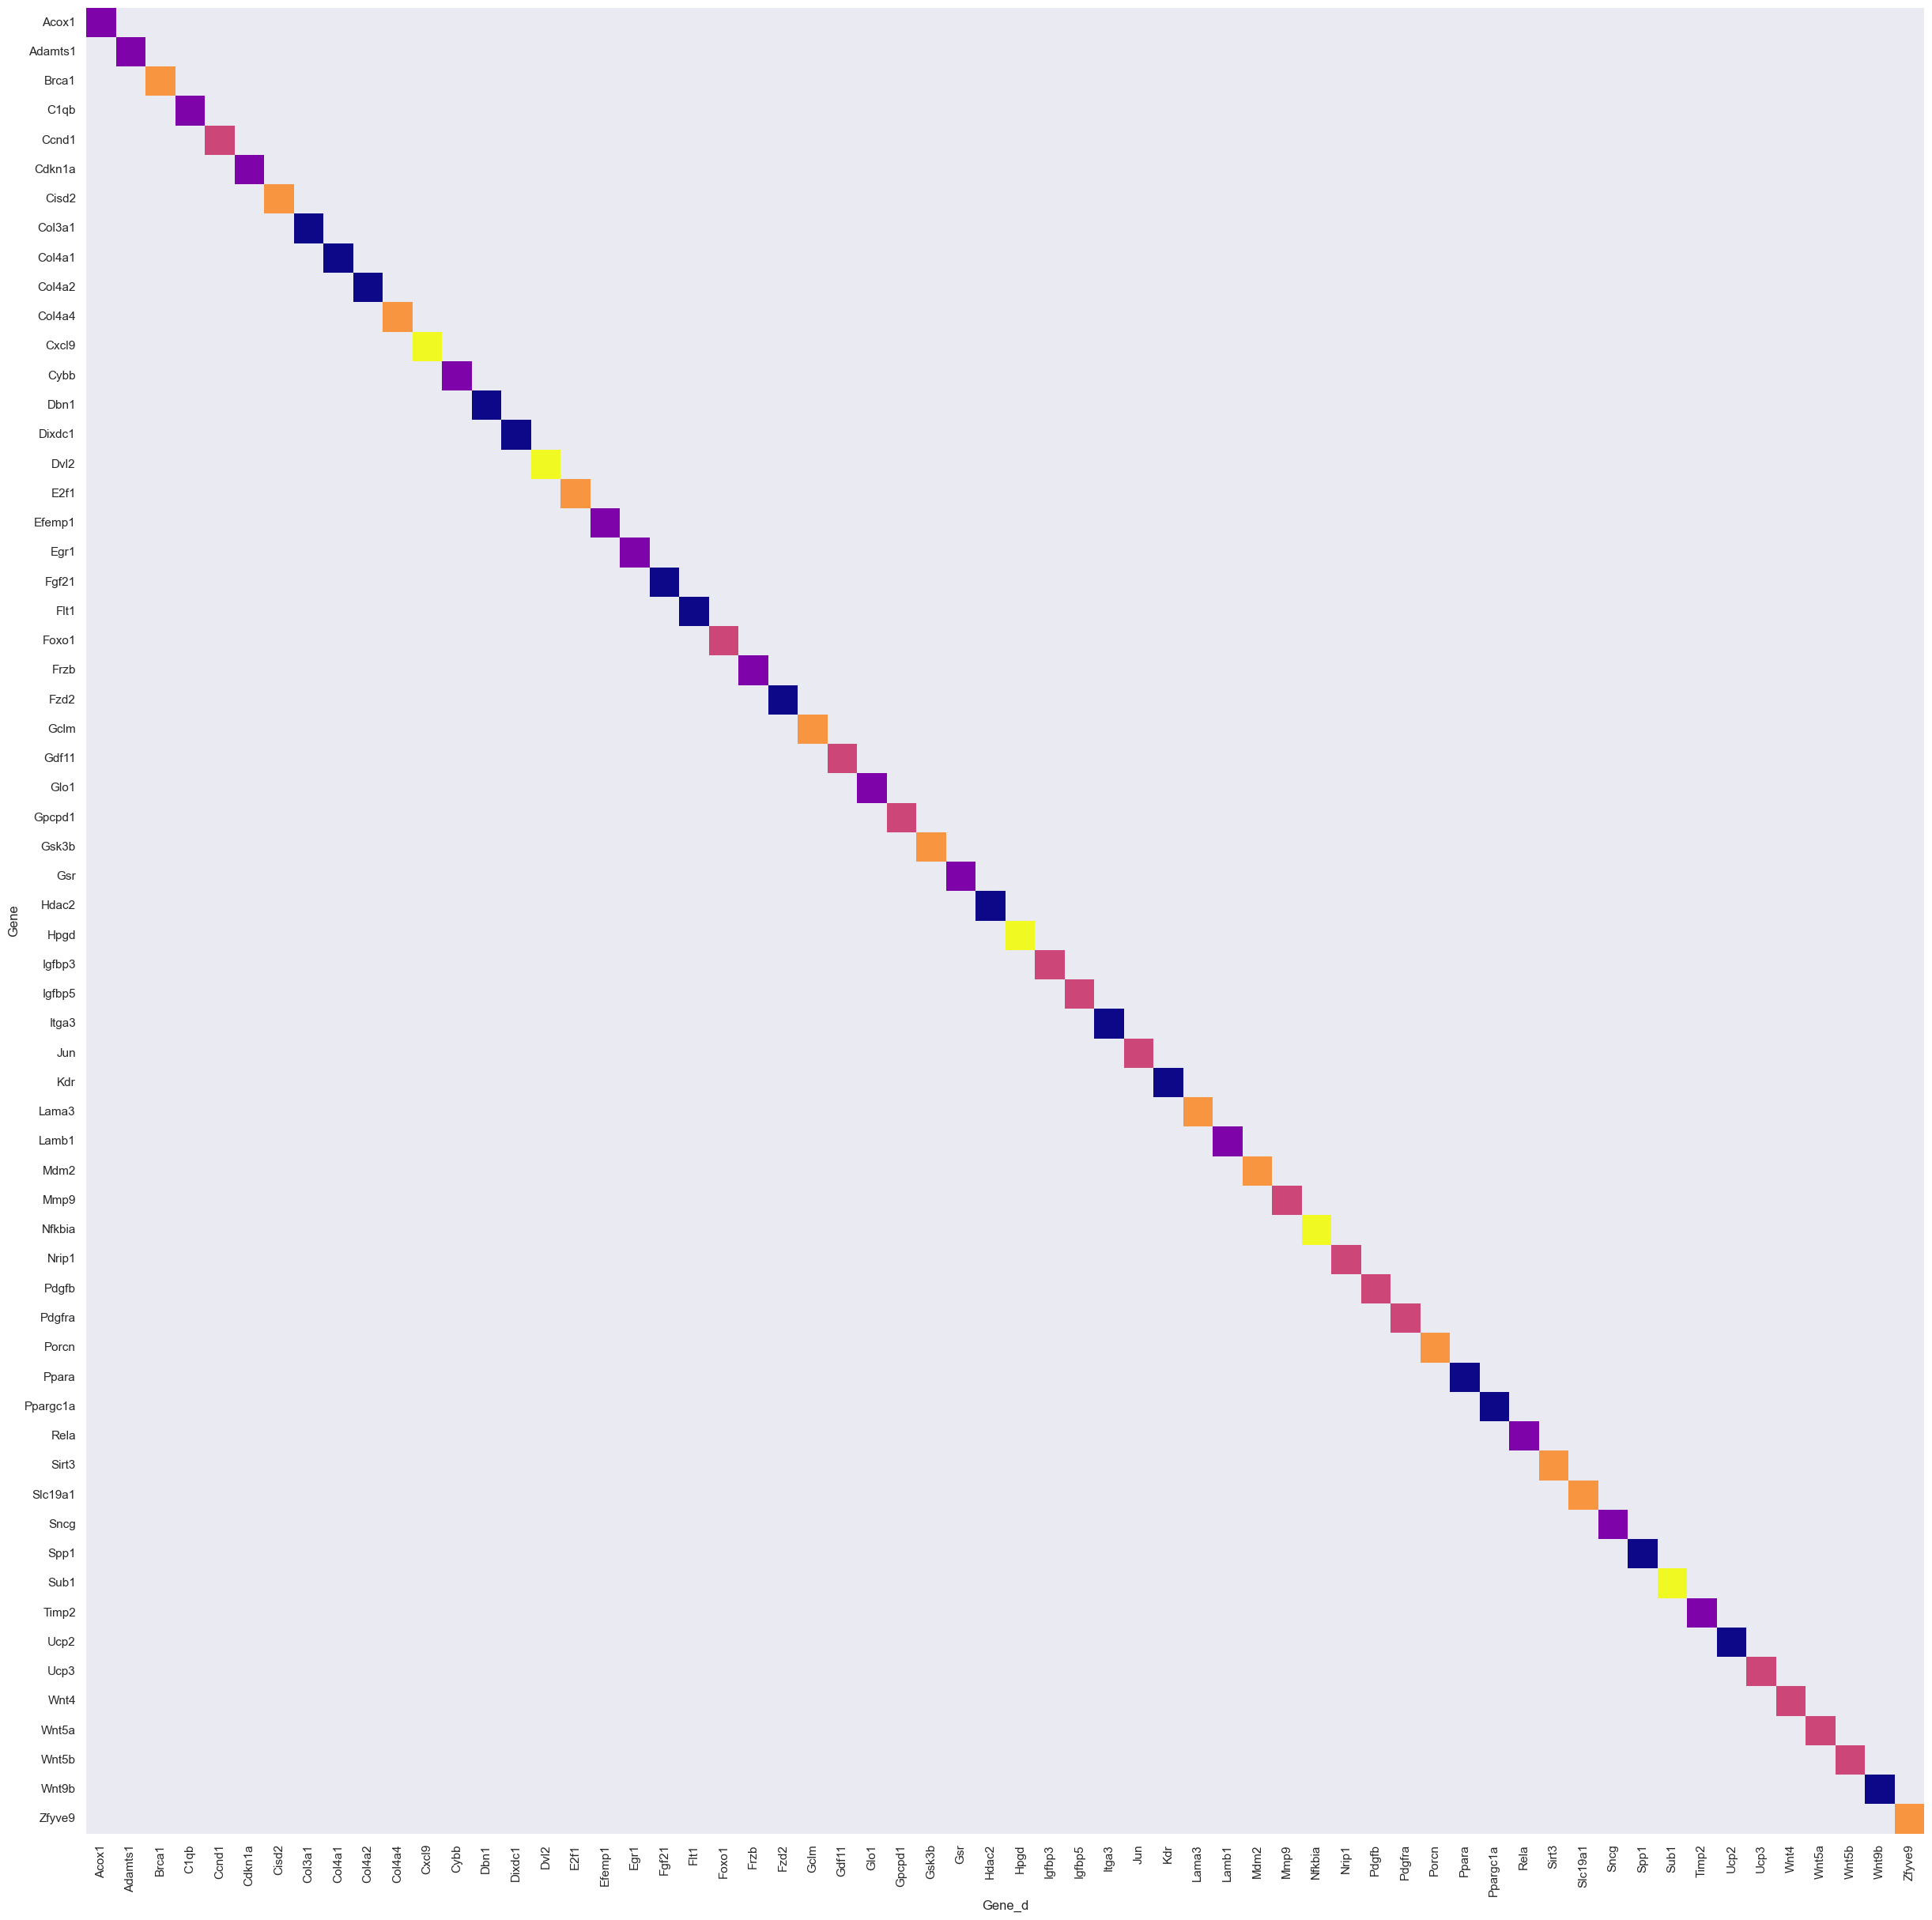

In [106]:
sns.heatmap(heatmap_overall_effect,vmin=1, vmax=5, center= 3, cmap= 'plasma', cbar=False)
sns.set(rc={'figure.figsize':(30,30)})

plt.show()

#### "диета уменьшает возраст увеличивает" - фиолетовый цвет
#### "диета увеличивает возраст уменьшает" - оранжевый цвет
#### "диета и возраст уменьшают" - синий цвет
#### "диета и возраст увеличивают" - желтый цвет
#### "противоречивых данных" - розовый цвет

#### <mark>Построем Heatmap для датасета с 9 генами max_genes_effect</mark>

In [107]:
heatmap_max_genes_effect = max_genes_effect.copy()

In [108]:
ColorEffect(heatmap_max_genes_effect)

In [109]:
heatmap_max_genes_effect = heatmap_max_genes_effect.pivot("Gene", "Gene_d", "effect_all")

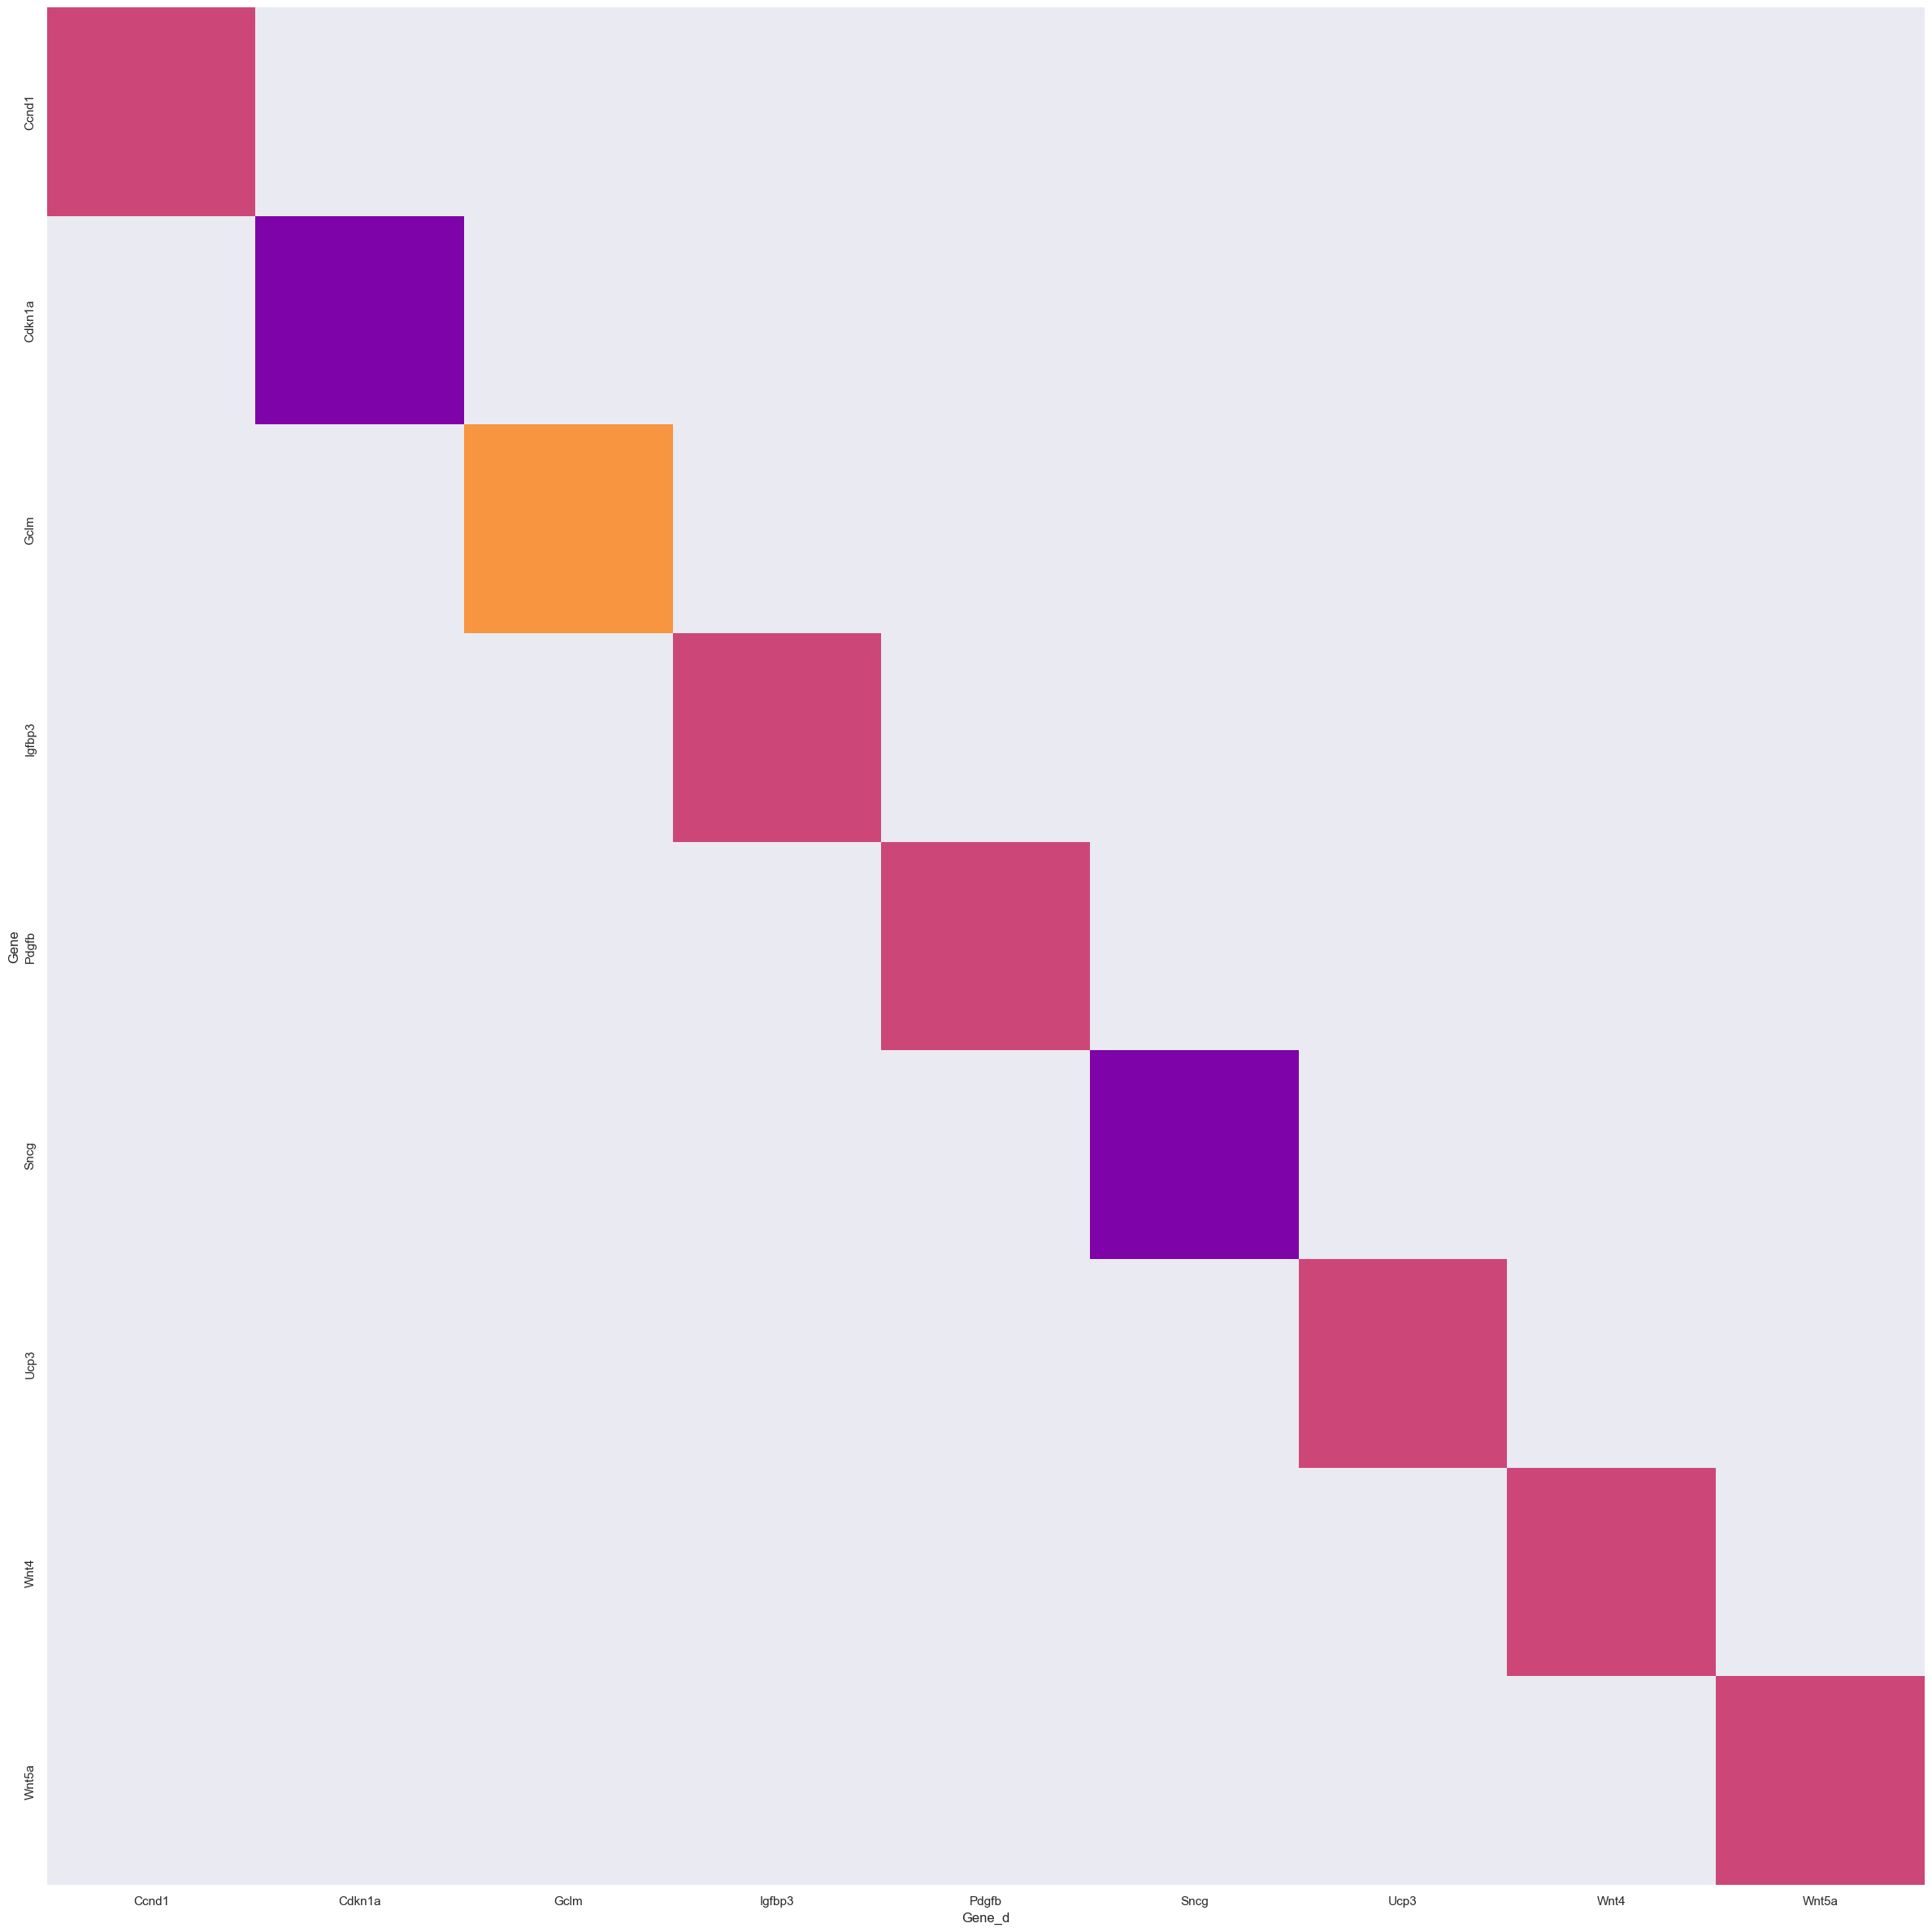

In [110]:
sns.heatmap(heatmap_max_genes_effect,vmin=1, vmax=5, center= 3, cmap= 'plasma',square=True, cbar=False)
sns.set(rc={'figure.figsize':(8,8)})

plt.show()

#### "диета уменьшает возраст увеличивает" - фиолетовый цвет
#### "диета увеличивает возраст уменьшает" - оранжевый цвет
#### "диета и возраст уменьшают" - синий цвет
#### "диета и возраст увеличивают" - желтый цвет
#### "противоречивых данных" - розовый цвет